In [21]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [4]:
path = "E:/Study and Work/The Sparks Foundation (TSF)/Task-2/"

In [3]:
def BGR_to_RGB(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_image

def RGB_to_BGR(image):
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return bgr_image

def BGR_to_GRAY(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def RGB_to_GRAY(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(path):
    image = cv2.imread(path)
    rgb_image = BGR_to_RGB(image=image)
    return rgb_image

def modify_image(image):    
    # modified_image = cv2.resize(image, resize_params, interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1],3)
    return modified_image

def get_colors(image, no_of_colors:int, show_chart:bool=False):

    kmeans_classifer = KMeans(n_clusters=no_of_colors)
    labels = kmeans_classifer.fit_predict(image)

    counts = Counter(labels)

    center_colors = kmeans_classifer.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (10, 10))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

In [6]:
os.listdir(path+"/images/")

['test1.jpeg',
 'test10.jpeg',
 'test11.jpeg',
 'test2.jpeg',
 'test3.jpeg',
 'test4.jpeg',
 'test5.jpeg',
 'test6.jpeg',
 'test7.jpeg',
 'test8.jpeg',
 'test9.jpeg']

In [8]:
images = []

for file in os.listdir(path+"/images/"):
    if not file.startswith('.'):
        images.append(get_image(path+"/images/"+file))

len(images)

11

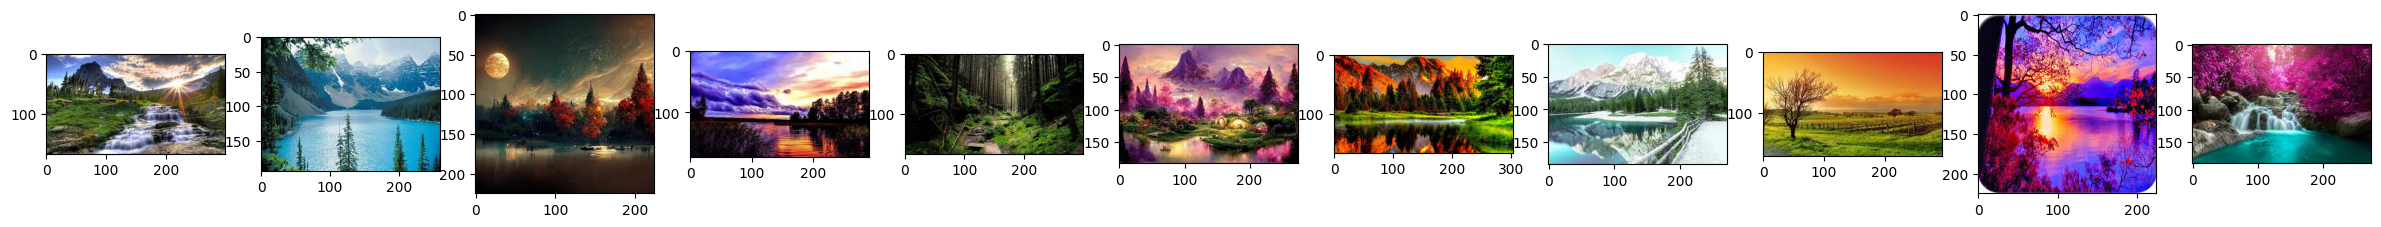

In [17]:
plt.figure(figsize=(30, 15))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [62]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    modified_image = modify_image(image=image)
    image_colors = get_colors(modified_image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image : bool = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image


def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(5, 5, index)
            plt.imshow(images[i])
            index += 1

In [23]:
my_colors = {
    'red': [255,0,0],
    'green' : [0,255,0],
    'blue' : [0,0,255],
    'yellow' : [255,255,0],
    'purple' : [160,32,240], 
    'magenta' : [255,0,255],
    'cyan' : [0,255,255],
    #'pink' : [],
    'orange' : [255,165,0],
    'brown' : [128,0,0],
    'white' : [255,255,255],
    'black' : [0,0,0]
}

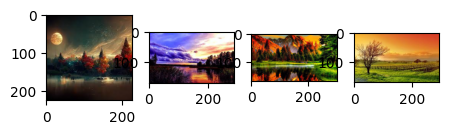

In [28]:
show_selected_images(images, color=my_colors['orange'], threshold=60, colors_to_match=5)

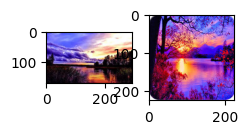

In [31]:
show_selected_images(images, color=my_colors['purple'], threshold=60, colors_to_match=len(my_colors))

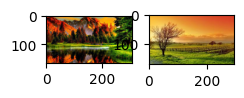

In [34]:
show_selected_images(images, color=my_colors['yellow'], threshold=60, colors_to_match=len(my_colors))

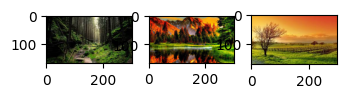

In [39]:
show_selected_images(images, color=my_colors['green'], threshold=90, colors_to_match=len(my_colors))

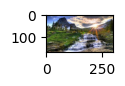

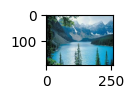

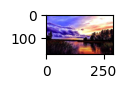

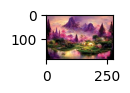

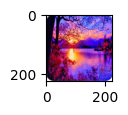

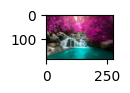

In [61]:
show_selected_images(images, color=my_colors['blue'], threshold=130, colors_to_match=len(my_colors))

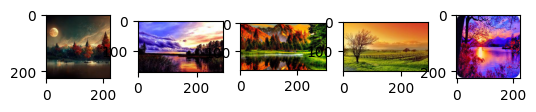

In [64]:
show_selected_images(images, color=my_colors['orange'], threshold=50, colors_to_match=len(my_colors))